In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [4]:
data = pd.read_csv('/Users/noachmeged/Documents/Ironhack/Labs/lab-customer-analysis-round-7/files_for_lab/csv_files/marketing_customer_analysis.csv') 

In [5]:
data.select_dtypes("object")

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [6]:
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [50]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,California,Nevada,Oregon,Washington,M
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Offer1,Agent,384.811147,Two-Door Car,Medsize,0.0,0.0,0.0,1.0,0.0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0.0,0.0,0.0,0.0,0.0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Offer1,Agent,566.472247,Two-Door Car,Medsize,0.0,1.0,0.0,0.0,0.0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Offer1,Call Center,529.881344,SUV,Medsize,1.0,0.0,0.0,0.0,1.0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Offer1,Agent,138.130879,Four-Door Car,Medsize,0.0,0.0,0.0,1.0,1.0


In [54]:
data.dtypes

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

In [61]:
numerical_data = data.select_dtypes(include='number')

# Select categorical columns
categorical_data = data.select_dtypes(exclude='number')

In [57]:
numerical_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,California,Nevada,Oregon,Washington,M
0,2763.519279,56274,69,32,5,0,1,384.811147,0.0,0.0,0.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,1131.464935,0.0,0.0,0.0,0.0,0.0
2,12887.431650,48767,108,18,38,0,2,566.472247,0.0,1.0,0.0,0.0,0.0
3,7645.861827,0,106,18,65,0,7,529.881344,1.0,0.0,0.0,0.0,1.0
4,2813.692575,43836,73,12,44,0,1,138.130879,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,1.0,0.0,0.0,0.0,1.0
9130,3096.511217,21604,79,14,28,0,1,379.200000,1.0,0.0,0.0,0.0,0.0
9131,8163.890428,0,85,9,37,3,2,790.784983,1.0,0.0,0.0,0.0,1.0
9132,7524.442436,21941,96,34,3,0,3,691.200000,1.0,0.0,0.0,0.0,1.0


In [62]:
categorical_data

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [86]:
# One Hot/Label Encoding (categorical).
encoder = OneHotEncoder(drop='first')
# Fit the encoder object to the categorical part of the DataFrame:
encoder.fit(data[["state", "gender", "education"]]) # notice that the input needs to be 2 dimentional, so if we used a Serie instead of a DataFrame we would have a shape related error
# Now that the encoder is fitted, you could export it, using the *pickle* library for example, and load it into other scripts.

OneHotEncoder(drop='first')

In [87]:
encoder.transform(data[["state", "gender", "education"]]).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [96]:
# Here we can get the name of each category, we will use this to rebuild our dataframe, since the encoder returns numpy arrays:
encoded_data = encoder.transform(data[["state", "gender", "education"]]).todense()
encoded_cols = list(encoder.get_feature_names_out(["state", "gender", "education"]))
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)
data = pd.concat([data, encoded_df], axis=1)


['California', 'Nevada', 'Oregon', 'Washington', 'M', 'M']

ValueError: Columns must be same length as key

In [97]:
# we don't need the gender and domain columns anymore:
data.drop(["state", "gender", "education"], axis=1, inplace=True)


In [99]:
data1.columns
data1

,customer,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,California,Nevada,Oregon,Washington,M
0,BU79786,2763.519279,No,Basic,2/24/11,Employed,56274,Suburban,Married,69,...,Offer1,Agent,384.811147,Two-Door Car,Medsize,0.0,0.0,0.0,1.0,0.0
1,QZ44356,6979.535903,No,Extended,1/31/11,Unemployed,0,Suburban,Single,94,...,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0.0,0.0,0.0,0.0,0.0
2,AI49188,12887.431650,No,Premium,2/19/11,Employed,48767,Suburban,Married,108,...,Offer1,Agent,566.472247,Two-Door Car,Medsize,0.0,1.0,0.0,0.0,0.0
3,WW63253,7645.861827,No,Basic,1/20/11,Unemployed,0,Suburban,Married,106,...,Offer1,Call Center,529.881344,SUV,Medsize,1.0,0.0,0.0,0.0,1.0
4,HB64268,2813.692575,No,Basic,2/3/11,Employed,43836,Rural,Single,73,...,Offer1,Agent,138.130879,Four-Door Car,Medsize,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,23405.987980,No,Basic,2/10/11,Employed,71941,Urban,Married,73,...,Offer2,Web,198.234764,Four-Door Car,Medsize,1.0,0.0,0.0,0.0,1.0
9130,PK87824,3096.511217,Yes,Extended,2/12/11,Employed,21604,Suburban,Divorced,79,...,Offer1,Branch,379.200000,Four-Door Car,Medsize,1.0,0.0,0.0,0.0,0.0
9131,TD14365,8163.890428,No,Extended,2/6/11,Unemployed,0,Suburban,Single,85,...,Offer1,Branch,790.784983,Four-Door Car,Medsize,1.0,0.0,0.0,0.0,1.0
9132,UP19263,7524.442436,No,Extended,2/3/11,Employed,21941,Suburban,Married,96,...,Offer3,Branch,691.200000,Four-Door Car,Large,1.0,0.0,0.0,0.0,1.0


In [101]:

# X-y split: here we keep only the data we will use to train the model
X = data1.drop(["customer","total_claim_amount",], axis=1)
y = data1["total_claim_amount"]

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model:
lm = LinearRegression()
lm.fit(X_train, y_train)

ValueError: could not convert string to float: 'Yes'

In [15]:
# Test the model:
predictions = lm.predict(X_test)
print("R2_score:", round(r2_score(y_test, predictions), 2))


ValueError: could not convert string to float: 'ZQ59828'

<Axes: xlabel='total_claim_amount'>

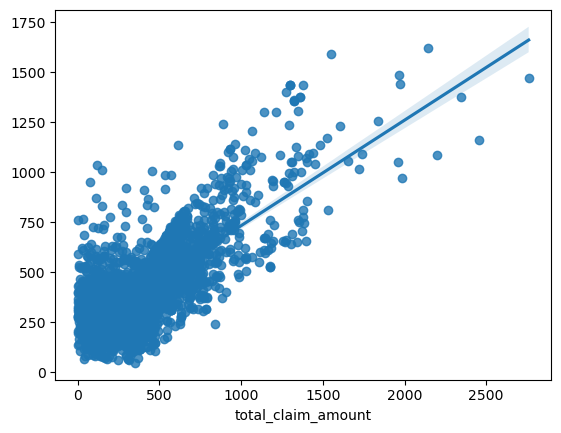

In [56]:
#show a plot
sns.regplot(x=y_test, y=predictions)


In [69]:
print("R2_score:", round(r2_score(y_test, predictions), 2))



R2_score: 0.52
RMSE: 197.58792071821807
MAE: 142.74013681391907


In [72]:

# Calculate your metrics:

rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.52
RMSE: 197.58792071821807
MAE: 142.74013681391907


In [74]:
print("R2_score:", round(r2_score(y_test, predictions), 2))


rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Calculate Mean Squared Error (MSE) without using squared parameter
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse:.4f}')

R2_score: 0.52
Root Mean Squared Error (RMSE): 197.5879
Mean Absolute Error (MAE): 142.7401
Mean Squared Error (MSE): 39040.9864


In [2]:
data1["object"]

NameError: name 'data1' is not defined

In [ ]:
#Improving the Model 
# One Hot/Label Encoding (categorical).
encoder = OneHotEncoder(drop='first')
# Fit the encoder object to the categorical part of the DataFrame:
encoder.fit(data[["state", "gender"]]) # notice that the input needs to be 2 dimentional, so if we used a Serie instead of a DataFrame we would have a shape related error
# Now that the encoder is fitted, you could export it, using the *pickle* library for example,